# Noise PSD and CSD Generation

**In the notebook, we demonstrate how to produce noise PSD from continuous data and save in a "filter" file used for the trigger and feature processing**



In [2]:
# import Noise class from detprocess
from detprocess import Noise

### Instantiate detprocess noise object

In [3]:
noise = Noise(verbose=True)

### Set or generate   random events from continuous data

Three ways of getting random events used to calculate noise PSD:
  1. generate randoms from continuous data
  2. set "randoms" vaex dataframe (produced by the processing or generated by Random object). Vaex dataframe can be either dataframe directly or full path to hdf5 file
  3. set randoms based on a list of events metadata. The list should follow format of detanalys.analyzer.get_event_list() function.

In [4]:
# continuous data directory, use argument "series" for list of series within continuous data directory
continuous_data = '/sdata1/runs/run20/raw/continuous_I2_D20220913_T134952'
series = None
# 1.  Generate randoms
#  use either "random_rate" or nevents
#  you can specify minimum separation between randoms (default=100msec) and from/to the edge of 
# the continuous data
noise.generate_randoms(continuous_data, series=series, nevents=1000, min_separation_msec=100, ncores=1)

# 2. set randoms from vaex dataframe (if dataframe from randoms has already been produced)
#noise.set_randoms(continuous_data, dataframe='/path/to/vaex/hdf5')


INFO: Found total of 312 raw data file(s) from 24 different series number!
INFO: Found total of 312 files from 24 different series number!
INFO Node #1: Acquiring randoms for series I2_D20220913_T134953
INFO Node #1: Acquiring randoms for series I2_D20220913_T142003
INFO Node #1: Acquiring randoms for series I2_D20220913_T145012
INFO Node #1: Acquiring randoms for series I2_D20220913_T152022
INFO Node #1: Acquiring randoms for series I2_D20220913_T155031
INFO Node #1: Acquiring randoms for series I2_D20220913_T162040
INFO Node #1: Acquiring randoms for series I2_D20220913_T165048
INFO Node #1: Acquiring randoms for series I2_D20220913_T172057
INFO Node #1: Acquiring randoms for series I2_D20220913_T175107
INFO Node #1: Acquiring randoms for series I2_D20220913_T182118
INFO Node #1: Acquiring randoms for series I2_D20220913_T185127
INFO Node #1: Acquiring randoms for series I2_D20220913_T192137
INFO Node #1: Acquiring randoms for series I2_D20220913_T195146
INFO Node #1: Acquiring rando

### Calculate PSD for each channels

In [5]:
# let's calculate PSD.
# We need to specify trace length and pretrigger length (either in "samples" or "msec") 
# nevents used for calculation can be smaller than the genererate randoms
# a tag can be specified with argument "tag"

noise.calc_psd(['IrPtTESSmall','IrPtTESBig', 'IrPtTESSmall+IrPtTESBig'], 
               trace_length_msec=20, 
               pretrigger_length_msec=10,
               nevents=1000)

INFO: Processing PSD for channel IrPtTESSmall
INFO: 936 events found in raw data for channel(s) IrPtTESSmall
INFO: Number of events after cuts = 257, efficiency = 27.46%
INFO: Processing PSD for channel IrPtTESBig
INFO: 936 events found in raw data for channel(s) IrPtTESBig
INFO: Number of events after cuts = 310, efficiency = 33.12%
INFO: Processing PSD for channel IrPtTESSmall+IrPtTESBig
INFO: Number of events after cuts = 297, efficiency = 31.73%


In [6]:
# get psd

# only one channel
psd, psd_freqs = noise.get_psd('IrPtTESSmall', fold=False)
print(psd.shape)

# or multiple channels
psd, psd_freqs = noise.get_psd(['IrPtTESSmall','IrPtTESBig', 'IrPtTESSmall+IrPtTESBig'], fold=False)
print(psd.shape)

(25000,)
(3, 25000)


#### Plot PSD(s)

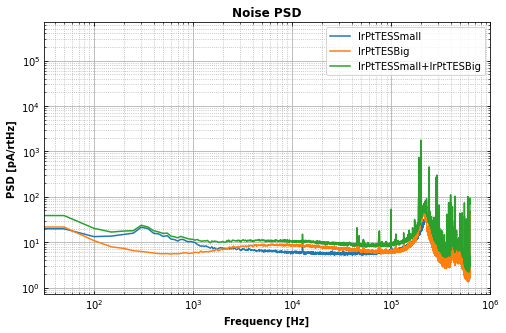

In [7]:
noise.plot_psd(['IrPtTESSmall', 'IrPtTESBig', 'IrPtTESSmall+IrPtTESBig'], unit='pA')

### Calculate CSD

The input channels can be either
 * a list such as **['channel1', 'channel2', 'channel3']**
 * or a string **'channel1|channel2|channel3'**
 
The index of the CSD follow order of the list or string!
 
The CSD is then stored in a dictionary and in hdf5 file with key = 'channel1|channel2|channel3' and can only be retrieved with the full name. 

In [8]:
noise.calc_csd(['IrPtTESSmall','IrPtTESBig', 'CPDv21Ge'],
               trace_length_msec=20, 
               pretrigger_length_msec=10,
               nevents=1000)

INFO: Number of events after cuts = 27, efficiency = 2.88%


In [9]:
# get the csd array (use string or channel array)
csd, csd_freqs = noise.get_csd('IrPtTESSmall|IrPtTESBig|CPDv21Ge')

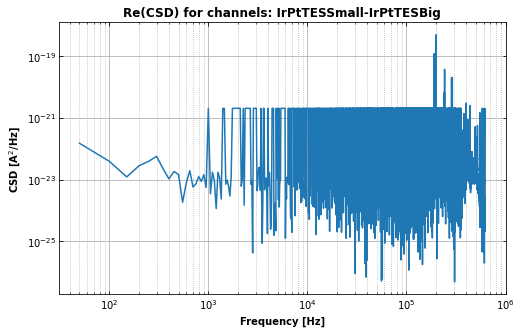

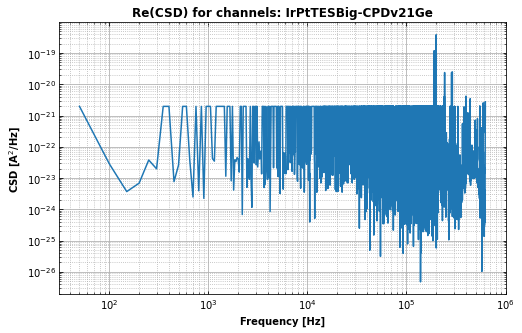

In [10]:
noise.plot_csd(['IrPtTESSmall','IrPtTESBig', 'CPDv21Ge'], whichcsd=['01','12'])

#### Display correlation coeffcients from CSD

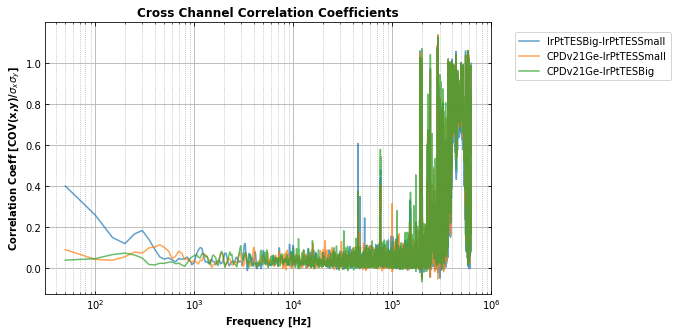

In [11]:
noise.plot_corrcoeff(['IrPtTESSmall','IrPtTESBig','CPDv21Ge'])

In [12]:
noise.describe()

List of channels: ['IrPtTESSmall', 'IrPtTESBig', 'IrPtTESSmall+IrPtTESBig', 'IrPtTESSmall|IrPtTESBig|CPDv21Ge']

Channel IrPtTESSmall:
 * Tag "default":
    psd: pandas.Series (25000,)

Channel IrPtTESBig:
 * Tag "default":
    psd: pandas.Series (25000,)

Channel IrPtTESSmall+IrPtTESBig:
 * Tag "default":
    psd: pandas.Series (25000,)

Channel IrPtTESSmall|IrPtTESBig|CPDv21Ge:
 * Tag "default":
    csd: 3D numpy.array  (3, 3, 25000)
    csd_freqs: 1D numpy.array  (25000,)


### Save filter file

In [13]:
# filter file can be loaded /saved using noise object
# use overwrite=True is psd with same tag already exist
file_name = './test_filter.hdf5'
noise.save_hdf5(file_name, overwrite=False)

INFO: Saving filter/TES data to file ./test_filter.hdf5!


In [14]:
# filter file can be also loaded. 
noise.load_hdf5('./test_filter.hdf5')
noise.describe()

INFO: Loading filter data from file ./test_filter.hdf5
List of channels: ['IrPtTESSmall', 'IrPtTESBig', 'IrPtTESSmall+IrPtTESBig', 'IrPtTESSmall|IrPtTESBig|CPDv21Ge']

Channel IrPtTESSmall:
 * Tag "default":
    psd: pandas.Series (25000,)

Channel IrPtTESBig:
 * Tag "default":
    psd: pandas.Series (25000,)

Channel IrPtTESSmall+IrPtTESBig:
 * Tag "default":
    psd: pandas.Series (25000,)

Channel IrPtTESSmall|IrPtTESBig|CPDv21Ge:
 * Tag "default":
    csd: 3D numpy.array  (3, 3, 25000)
    csd_freqs: pandas.Series (25000,)
